In [1]:
import numpy as np
import cv2
import scipy as scipy
import scipy.interpolate
import matplotlib.pyplot as plt
from astropy.io import fits
import polarTransform
from astropy.utils.data import get_pkg_data_filename
from scipy.stats import wasserstein_distance
import Bicone_Classifier
from marvin.tools import Maps

[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


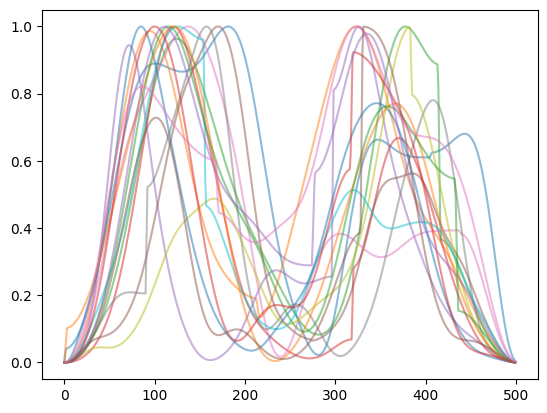

In [2]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data


for data in hdu:
        plateifu = str(data[0])
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu, method='min', smooth=9)[0]
        plt.plot(BC_EW_hist, alpha = 0.5)

#x = np.linspace(0,4*np.pi,500)
#y = 0.5*np.cos(x)+0.5
#plt.plot(y, color = 'k')
plt.show()
        

## see if there's any difference between different curve shapes
Comp = ['7972-3704','8486-12705','8715-6103','8718-12702','10518-3704','11826-6103','11958-3703','12673-6101','12700-6101','7958-9101']
Single = ['8138-6101','8252-9101','8465-12704','9031-12704','9867-9102','10502-12701','10517-3701']

for plateifu in Comp:
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)[0]
        print(plateifu)
        plt.plot(BC_EW_hist, alpha = 0.5)

x = np.linspace(0,4*np.pi,500)
y1 = 0.4*np.cos(x)+0.4
y2 = 0.1*np.cos(5*(x+np.pi))
y = np.add(y1, y2)
plt.plot(y, color = 'k')
plt.show()

HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
header_hdul = fits.open(HEADER_PATH)['SPX-MILESHC-MASTARSSP'].data
plateifu = header_hdul['plateifu']

for data in plateifu[0:20]:
        plateifu = data
        BC_EW_hist = Bicone_Classifier.generate_profile_histogram(plateifu)[0]
        plt.plot(BC_EW_hist)
    
plt.show()